# Test the model with my own images


In [1]:
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import os
from math import ceil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

%matplotlib inline

my_testdir = os.path.join(os.getcwd(), 'my_testdata')

Using TensorFlow backend.


## Check the format of test images

In [2]:
def rgba_to_jpg(rgba_img):
    # https://stackoverflow.com/questions/9166400/convert-rgba-png-to-rgb-with-pil
    
    # print(" <In rgba_to_jpg> : {}".format(filename))
    background = Image.new('RGBA', rgba_img.size, (255,255,255))
    
    alpha_composite = Image.alpha_composite(background, rgba_img)
    
    return alpha_composite.convert('RGB')

    

def files_to_dir(dirname):
    ''' Copy images in dirname = "my_testdata" to "prediction"'''
    
    pred_dir = os.path.join(os.getcwd(), 'prediction/images')
    
    pred_files = [f for f in os.listdir(dirname) if os.path.isfile(os.path.join(dirname, f))]
    print("Number of test images : {}".format(len(pred_files)))

    # Make "prediction/images" directory if not exist
    if not os.path.exists(pred_dir):
        os.makedirs(pred_dir)
    
    
    for f in pred_files:
        orig_file = os.path.join(dirname, f)        
    
        # resize image if it's too big (larger than 640px at the longest edge)
        MAXLEN = 640
       
        im = Image.open(orig_file)
        w, h = im.size
        maxedge = max((w, h))
        if maxedge > MAXLEN:
            r = MAXLEN / maxedge
            new_w = int(w * r)
            new_h = int(h * r)
            im = im.resize((new_w, new_h)) 
        
        # Check mode and convert into JPG, also rename filename to ".jpg"
        if im.mode == 'RGBA':          
            im = rgba_to_jpg(im)
            new_fname = f.split('.')[0] + ".jpg"
            print(" <RGBA> : {} -> {}".format(f, new_fname))
            
        elif im.mode == 'P':
            im = im.convert("RGB")
            new_fname = f.split('.')[0] + ".jpg"
            print(" <P> : {} -> {}".format(f, new_fname))
            
        else:
            ext = f.split('.')[1]
            if im.mode == 'RGB' and \
               ext != "jpg" and ext != "jpeg" and ext != "JPG" and ext != "JPEG":               
                new_fname = f.split('.')[0] + ".jpg"
                print(" <rename> : {} -> {}".format(f, new_fname))
            else:
                new_fname = f
            
        new_created_file = os.path.join(pred_dir, new_fname)
        if os.path.exists(new_created_file):
            os.remove(new_created_file)
        im.save(new_created_file, "JPEG")
        

    return pred_dir


## Copy images in 'my_testdata' directory to 'prediction/images'

In [3]:
pred_dir = files_to_dir(my_testdir)
num_pred_files = len(os.listdir(pred_dir))
print("Copy finished : {} in {}".format(num_pred_files, pred_dir))

Number of test images : 28
Copy finished : 28 in /home/chieko/Projects/Food_project/prediction/images


## Predict images

In [4]:
my_test_datagen = ImageDataGenerator(rescale=1./255)

#classes = ['no_food', 'food']

# NOTE: batch_size=1, class_mode=None, shuffle=False
my_test_generator = my_test_datagen.flow_from_directory(
    os.path.dirname(pred_dir), target_size=(224, 224), batch_size=1, class_mode=None, shuffle=False)

#model = load_model('food_model_resnet.h5')
model = load_model("food_model_resnet_1573727092.h5")

my_test_generator.reset()

# pred: {'no_food': 0, 'food' : 1}
pred = model.predict_generator(my_test_generator, steps=num_pred_files, verbose=1)

W1121 16:31:59.586382 139939950683968 deprecation_wrapper.py:119] From /home/chieko/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1121 16:31:59.611953 139939950683968 deprecation_wrapper.py:119] From /home/chieko/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1121 16:31:59.621205 139939950683968 deprecation_wrapper.py:119] From /home/chieko/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1121 16:31:59.629769 139939950683968 deprecation_wrapper.py:119] From /home/chieko/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1121 1

Found 28 images belonging to 1 classes.


W1121 16:32:00.036038 139939950683968 deprecation_wrapper.py:119] From /home/chieko/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W1121 16:32:02.972467 139939950683968 deprecation.py:506] From /home/chieko/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1121 16:32:05.113337 139939950683968 deprecation_wrapper.py:119] From /home/chieko/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1121 16:32:05.119588 139939950683968 deprecation.py:323] From /home/chieko/anaconda3/lib/python3.7/si

28/28 [==============================] - 2s 82ms/step


In [5]:
print(pred.shape)
pred_images = my_test_generator.filenames

(28, 1)


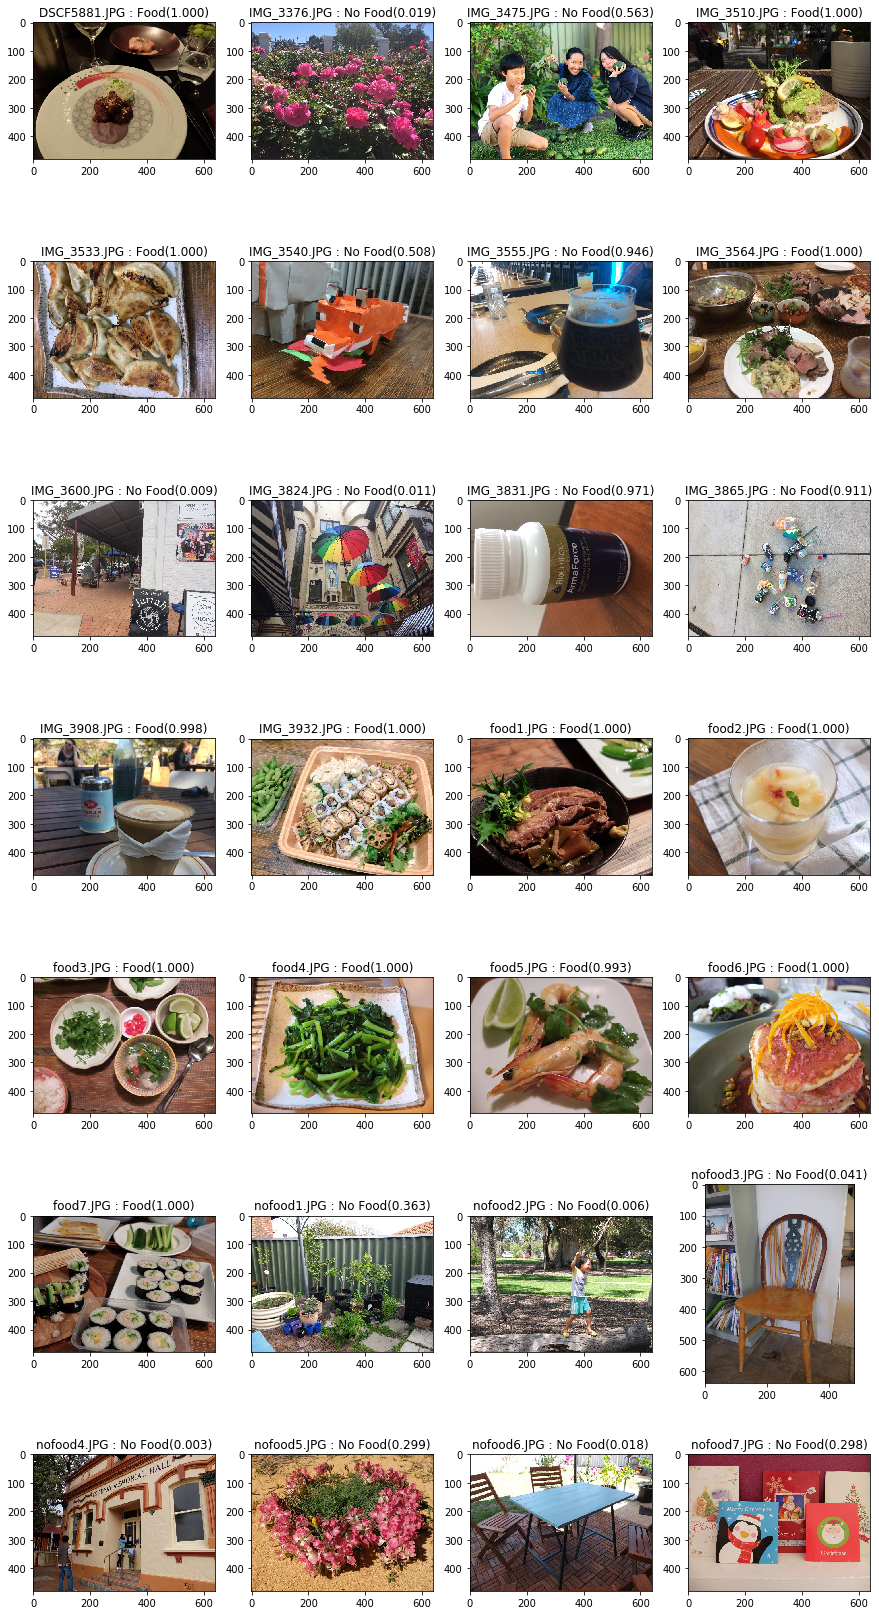

In [6]:
num_images = pred.shape[0]

rows = ceil(num_images / 4)

f, ax = plt.subplots(rows, 4, figsize=(15, 30))

thr = 0.99  # accuracy = 0.97

for i in range(num_images):
    result = "Food" if pred[i][0] > thr else "No Food"
    img = mpimg.imread(os.path.join(os.path.dirname(pred_dir), pred_images[i]))
    ax[i // 4, i % 4].imshow(img)
    ax[i // 4, i % 4].set_title("{} : {}({:.3f})".format(os.path.basename(pred_images[i]), result, pred[i][0]))

plt.show()